# **Exploratory Data Analysis**


---


Melakukan eksplorasi dan persiapan data untuk membangun model.
Data yang dipakai dari 

> https://opendata.jabarprov.go.id/id/dataset?organization=badan-penanggulangan-bencana-daerah





In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.cm as cm


In [ ]:
df1 = pd.read_csv('angin_topan_puting_beliung.csv')
df2 = pd.read_csv('banjir.csv')
df3 = pd.read_csv('gelombang_pasang.csv')
df4 = pd.read_csv('gempa_bumi.csv')
df5 = pd.read_csv('kebakaran.csv')
df6 = pd.read_csv('kebakaran_bangunan.csv')
df7 = pd.read_csv('kebakaran_lahan.csv')
df8 = pd.read_csv('tanah_longsor.csv')


In [ ]:
df6.isnull().any()

id                           False
kode_provinsi                False
nama_provinsi                False
kode_kabupaten_kota          False
nama_kabupaten_kota          False
jumlah_kebakaran_bangunan    False
satuan                       False
tahun                        False
dtype: bool

In [ ]:
key_columns=['id','kode_provinsi','nama_provinsi','kode_kabupaten_kota','nama_kabupaten_kota','satuan','tahun']



In [ ]:
df_1 = pd.merge(df1,df2, how='left', on=key_columns)
df_2 = pd.merge(df_1, df3, how='left',on=key_columns)
df_3 = pd.merge(df_2, df4, how='left',on=key_columns)
df_4 = pd.merge(df_3, df5, how='left',on=key_columns)
df_5 = pd.merge(df_4, df6, how='left',on=key_columns)
df_6 = pd.merge(df_5, df7, how='left',on=key_columns)
df = pd.merge(df_6, df8, how='left',on=key_columns)

In [ ]:
df.to_csv('bencana.csv', index=False)

In [ ]:
data = pd.read_csv("bencana.csv")
data

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jumlah_puting_beliung,satuan,tahun,jumlah_banjir,jumlah_gelombang_pasang,jumlah_gempa_bumi,jumlah_kebakaran,jumlah_kebakaran_bangunan,jumlah_kebakaran_lahan,jumlah_tanah_longsor
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,2,KEJADIAN,2012,0,0,3,0.0,NaN,NaN,0
1,2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,27,KEJADIAN,2012,20,0,41,34.0,NaN,NaN,48
2,3,32,JAWA BARAT,3203,KABUPATEN CIANJUR,23,KEJADIAN,2012,1,0,0,4.0,NaN,NaN,9
3,4,32,JAWA BARAT,3204,KABUPATEN BANDUNG,3,KEJADIAN,2012,17,0,0,3.0,NaN,NaN,12
4,5,32,JAWA BARAT,3205,KABUPATEN GARUT,28,KEJADIAN,2012,7,1,0,59.0,NaN,NaN,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,237,32,JAWA BARAT,3275,KOTA BEKASI,1,KEJADIAN,2020,5,0,0,NaN,NaN,NaN,0
237,238,32,JAWA BARAT,3276,KOTA DEPOK,3,KEJADIAN,2020,5,0,0,NaN,NaN,NaN,6
238,239,32,JAWA BARAT,3277,KOTA CIMAHI,5,KEJADIAN,2020,13,0,0,NaN,NaN,NaN,1
239,240,32,JAWA BARAT,3278,KOTA TASIKMALAYA,3,KEJADIAN,2020,0,0,0,NaN,NaN,NaN,5


In [ ]:
data.columns

Index(['id', 'kode_provinsi', 'nama_provinsi', 'kode_kabupaten_kota',
       'nama_kabupaten_kota', 'jumlah_puting_beliung', 'satuan', 'tahun',
       'jumlah_banjir', 'jumlah_gelombang_pasang', 'jumlah_gempa_bumi',
       'jumlah_kebakaran', 'jumlah_kebakaran_bangunan',
       'jumlah_kebakaran_lahan', 'jumlah_tanah_longsor'],
      dtype='object')

In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,241.0,121.000000,69.714896,1.0,61.0,121.0,181.0,241.0
kode_provinsi,241.0,32.000000,0.000000,32.0,32.0,32.0,32.0,32.0
kode_kabupaten_kota,241.0,3231.443983,31.372460,3201.0,3207.0,3214.0,3273.0,3279.0
jumlah_puting_beliung,241.0,9.568465,16.817293,0.0,1.0,5.0,12.0,183.0
tahun,241.0,2016.029046,2.577787,2012.0,2014.0,2016.0,2018.0,2020.0
jumlah_banjir,241.0,6.717842,9.082220,0.0,1.0,4.0,8.0,71.0
jumlah_gelombang_pasang,241.0,0.087137,0.393542,0.0,0.0,0.0,0.0,4.0
jumlah_gempa_bumi,241.0,1.941909,7.783847,0.0,0.0,0.0,1.0,70.0
jumlah_kebakaran,187.0,11.545455,17.175934,0.0,0.0,4.0,16.0,93.0
jumlah_kebakaran_bangunan,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         241 non-null    int64  
 1   kode_provinsi              241 non-null    int64  
 2   nama_provinsi              241 non-null    object 
 3   kode_kabupaten_kota        241 non-null    int64  
 4   nama_kabupaten_kota        241 non-null    object 
 5   jumlah_puting_beliung      241 non-null    int64  
 6   satuan                     241 non-null    object 
 7   tahun                      241 non-null    int64  
 8   jumlah_banjir              241 non-null    int64  
 9   jumlah_gelombang_pasang    241 non-null    int64  
 10  jumlah_gempa_bumi          241 non-null    int64  
 11  jumlah_kebakaran           187 non-null    float64
 12  jumlah_kebakaran_bangunan  0 non-null      float64
 13  jumlah_kebakaran_lahan     0 non-null      float64

In [ ]:
data.isnull().sum()

id                             0
kode_provinsi                  0
nama_provinsi                  0
kode_kabupaten_kota            0
nama_kabupaten_kota            0
jumlah_puting_beliung          0
satuan                         0
tahun                          0
jumlah_banjir                  0
jumlah_gelombang_pasang        0
jumlah_gempa_bumi              0
jumlah_kebakaran              54
jumlah_kebakaran_bangunan    241
jumlah_kebakaran_lahan       241
jumlah_tanah_longsor           0
dtype: int64

Terlihat bahwa, pada kolom "kebakaran_bangunan" dan "kebakaran_lahan" terdapat nilai Null

In [ ]:
data['jumlah_kebakaran'].replace((np.NaN),(0),inplace=True)
data['jumlah_kebakaran_bangunan'].replace((np.NaN),(0),inplace=True)
data['jumlah_kebakaran_lahan'].replace((np.NaN),(0),inplace=True)
data.isnull().sum()

id                           0
kode_provinsi                0
nama_provinsi                0
kode_kabupaten_kota          0
nama_kabupaten_kota          0
jumlah_puting_beliung        0
satuan                       0
tahun                        0
jumlah_banjir                0
jumlah_gelombang_pasang      0
jumlah_gempa_bumi            0
jumlah_kebakaran             0
jumlah_kebakaran_bangunan    0
jumlah_kebakaran_lahan       0
jumlah_tanah_longsor         0
dtype: int64

In [ ]:
data = data.drop(['kode_provinsi', 'nama_provinsi'], axis=1)
data

,id,kode_kabupaten_kota,nama_kabupaten_kota,jumlah_puting_beliung,satuan,tahun,jumlah_banjir,jumlah_gelombang_pasang,jumlah_gempa_bumi,jumlah_kebakaran,jumlah_kebakaran_bangunan,jumlah_kebakaran_lahan,jumlah_tanah_longsor
0,1,3201,KABUPATEN BOGOR,2,KEJADIAN,2012,0,0,3,0.0,0.0,0.0,0
1,2,3202,KABUPATEN SUKABUMI,27,KEJADIAN,2012,20,0,41,34.0,0.0,0.0,48
2,3,3203,KABUPATEN CIANJUR,23,KEJADIAN,2012,1,0,0,4.0,0.0,0.0,9
3,4,3204,KABUPATEN BANDUNG,3,KEJADIAN,2012,17,0,0,3.0,0.0,0.0,12
4,5,3205,KABUPATEN GARUT,28,KEJADIAN,2012,7,1,0,59.0,0.0,0.0,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,237,3275,KOTA BEKASI,1,KEJADIAN,2020,5,0,0,0.0,0.0,0.0,0
237,238,3276,KOTA DEPOK,3,KEJADIAN,2020,5,0,0,0.0,0.0,0.0,6
238,239,3277,KOTA CIMAHI,5,KEJADIAN,2020,13,0,0,0.0,0.0,0.0,1
239,240,3278,KOTA TASIKMALAYA,3,KEJADIAN,2020,0,0,0,0.0,0.0,0.0,5


In [ ]:
data = data.drop(['jumlah_kebakaran_lahan', 'jumlah_kebakaran_bangunan'], axis=1)
data

,id,kode_kabupaten_kota,nama_kabupaten_kota,jumlah_puting_beliung,satuan,tahun,jumlah_banjir,jumlah_gelombang_pasang,jumlah_gempa_bumi,jumlah_kebakaran,jumlah_tanah_longsor
0,1,3201,KABUPATEN BOGOR,2,KEJADIAN,2012,0,0,3,0.0,0
1,2,3202,KABUPATEN SUKABUMI,27,KEJADIAN,2012,20,0,41,34.0,48
2,3,3203,KABUPATEN CIANJUR,23,KEJADIAN,2012,1,0,0,4.0,9
3,4,3204,KABUPATEN BANDUNG,3,KEJADIAN,2012,17,0,0,3.0,12
4,5,3205,KABUPATEN GARUT,28,KEJADIAN,2012,7,1,0,59.0,36
...,...,...,...,...,...,...,...,...,...,...,...
236,237,3275,KOTA BEKASI,1,KEJADIAN,2020,5,0,0,0.0,0
237,238,3276,KOTA DEPOK,3,KEJADIAN,2020,5,0,0,0.0,6
238,239,3277,KOTA CIMAHI,5,KEJADIAN,2020,13,0,0,0.0,1
239,240,3278,KOTA TASIKMALAYA,3,KEJADIAN,2020,0,0,0,0.0,5


In [ ]:
!pip install category_encoders

In [ ]:
!pip install kneed 
from kneed import DataGenerator, KneeLocator 

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

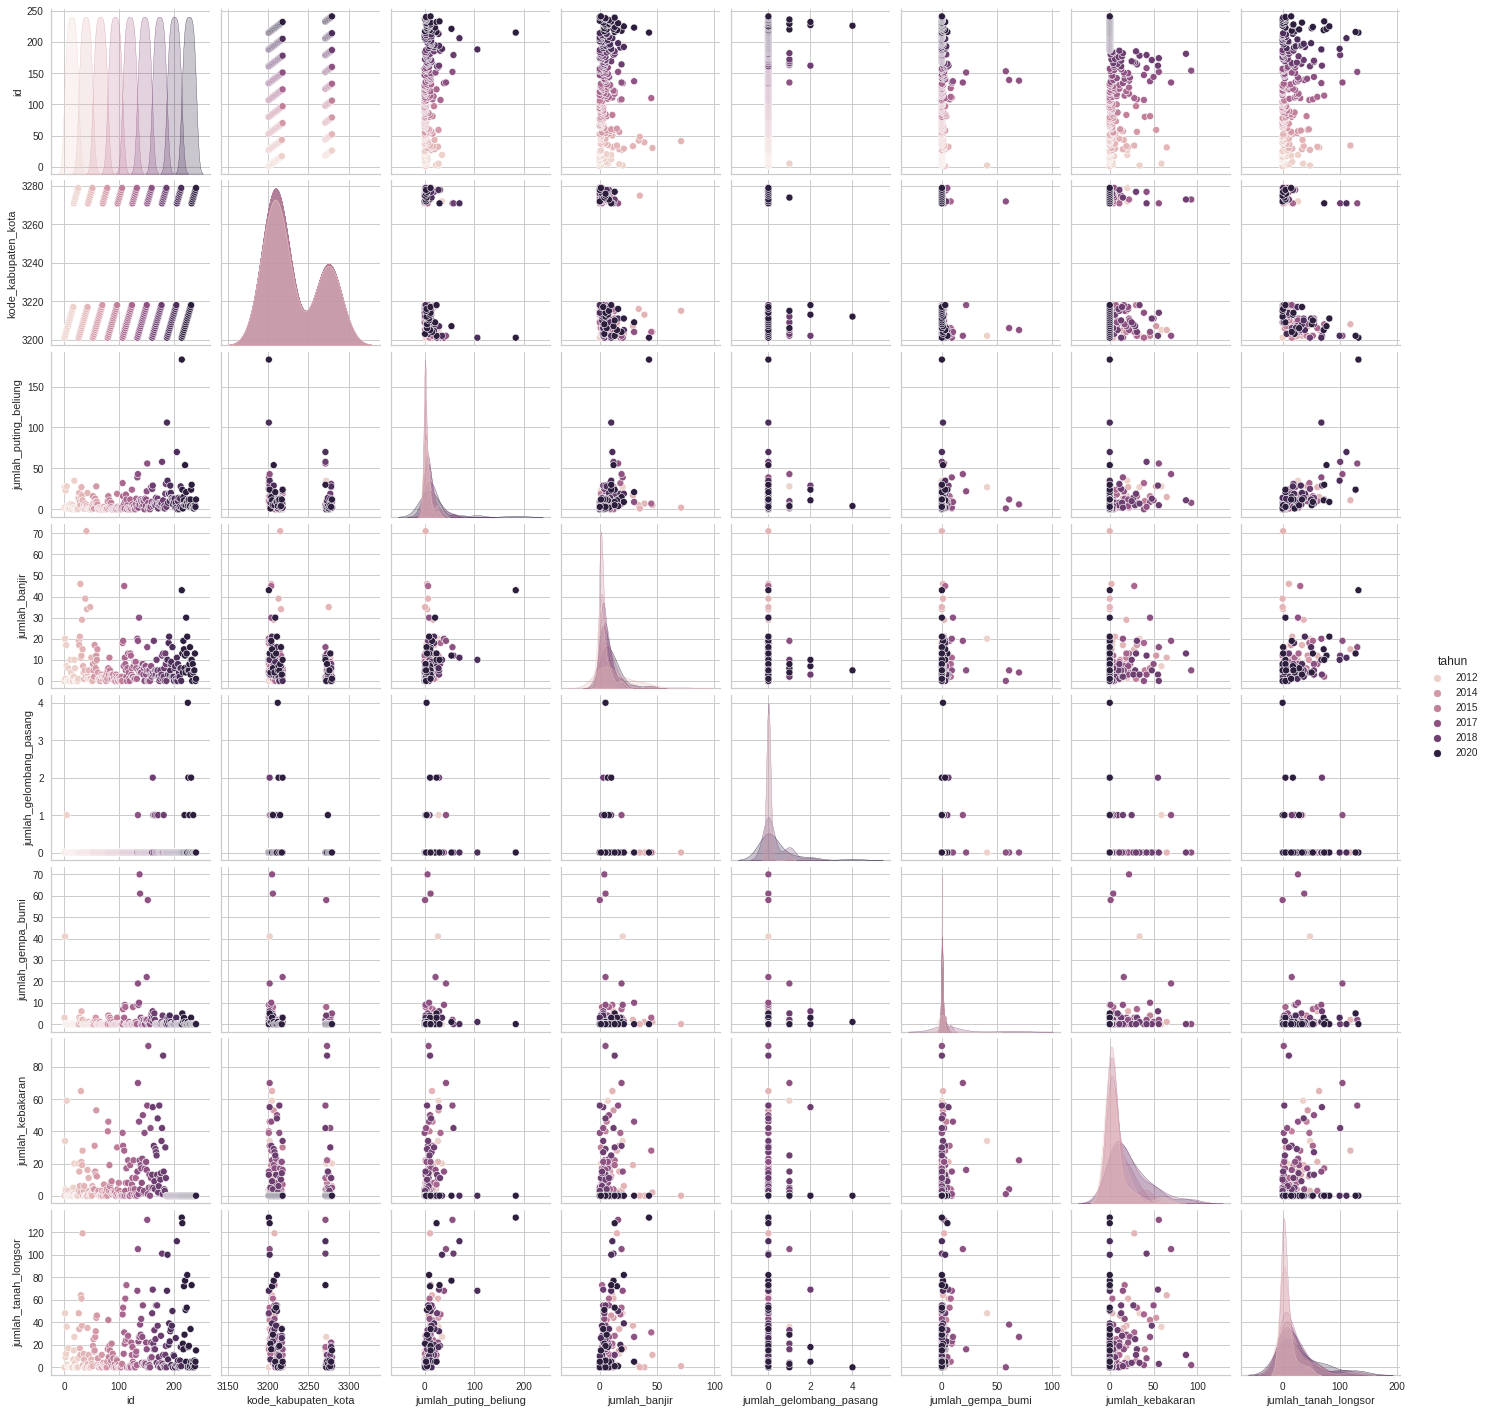

In [ ]:
# visualisasikan kolom numerik yang dikelompokkan berdasarkan 'tahun'
sns.pairplot(data,hue='tahun')

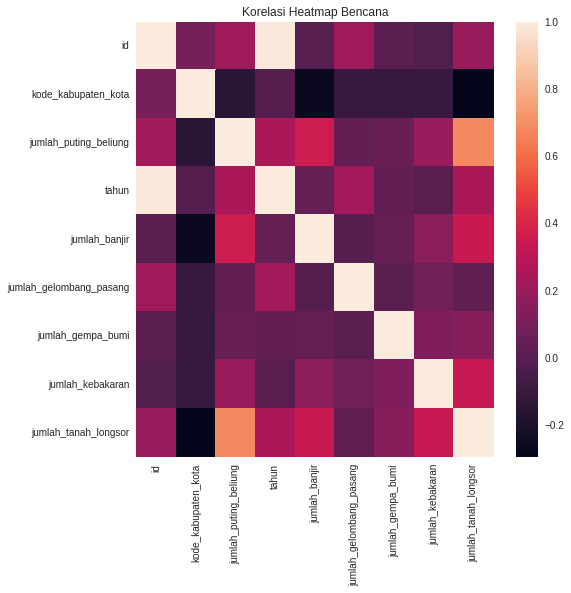

In [ ]:
plt.figure(figsize = (8,8))
sns.heatmap(data.corr(),annot=False,fmt="f").set_title("Korelasi Heatmap Bencana")
plt.show()

In [ ]:
z_numerics = data[['kode_kabupaten_kota', 'jumlah_banjir', 'jumlah_tanah_longsor']]

In [ ]:
scaler = StandardScaler()
df = data.drop(['id', 'kode_kabupaten_kota','nama_kabupaten_kota', 'satuan', 'tahun'],axis=1)
data_scaled = scaler.fit_transform(df.astype(float))

In [ ]:
from sklearn.metrics import silhouette_score
n_clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
clusters_inertia = [] # inertia of clusters
s_scores = [] # silhouette scores

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(z_numerics)
    clusters_inertia.append(KM_est.inertia_)    # data for the elbow method
    silhouette_avg = silhouette_score(z_numerics, KM_est.labels_)
    s_scores.append(silhouette_avg) # data for the silhouette score method

In [ ]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=25, random_state=0)
    kmeans.fit(z_numerics)
    wcss.append(kmeans.inertia_)
kl = KneeLocator(
    range(1,11), wcss, curve="convex", direction= "decreasing")
kl.elbow 

3

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


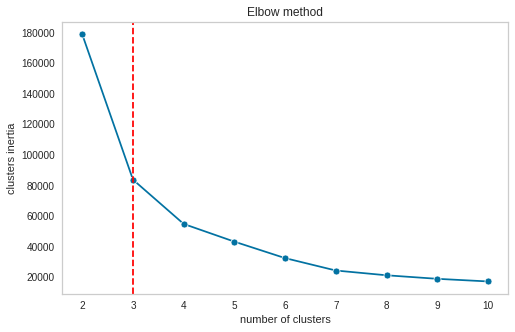

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
ax = sns.lineplot(n_clusters, clusters_inertia, marker='o', ax=ax)
ax.set_title("Elbow method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("clusters inertia")
ax.axvline(kl.elbow, ls="--", c="red")
plt.grid()
plt.show()

In [ ]:
x = data[['kode_kabupaten_kota', 'jumlah_banjir']]

Untuk n_clusters = 2 Rerata silhouette_score adalah : 0.8466943322660838
Untuk n_clusters = 3 Rerata silhouette_score adalah : 0.7055734998960145
Untuk n_clusters = 4 Rerata silhouette_score adalah : 0.6067449718170494
Untuk n_clusters = 5 Rerata silhouette_score adalah : 0.5935794393774427
Untuk n_clusters = 6 Rerata silhouette_score adalah : 0.4764347500990712
Untuk n_clusters = 7 Rerata silhouette_score adalah : 0.47752209452674405
Untuk n_clusters = 8 Rerata silhouette_score adalah : 0.46612967518228565
Untuk n_clusters = 9 Rerata silhouette_score adalah : 0.45733868955483176
Untuk n_clusters = 10 Rerata silhouette_score adalah : 0.46502710209710935


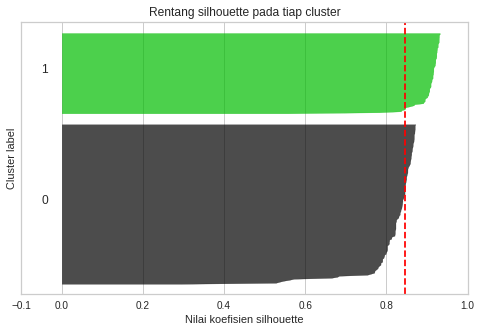

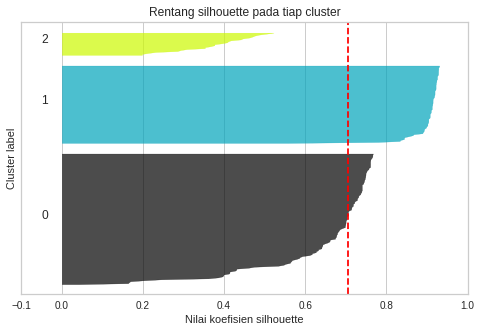

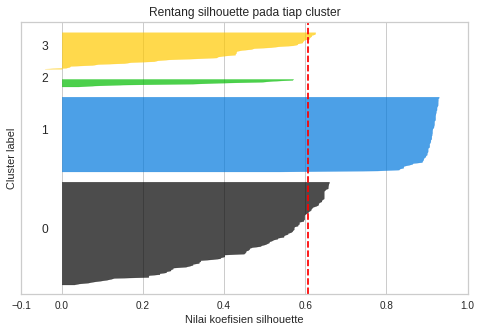

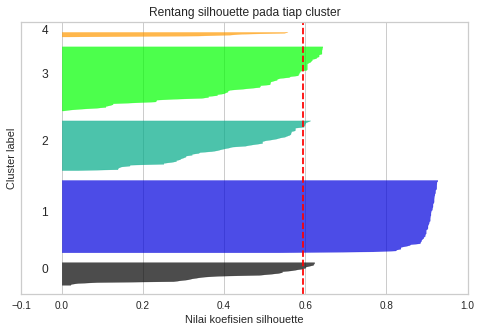

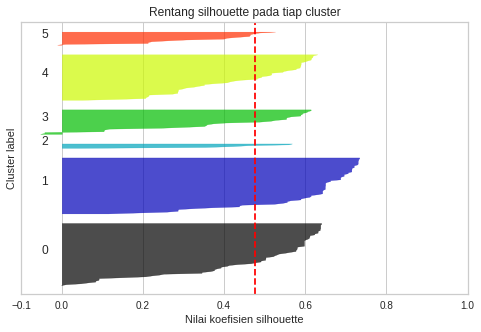

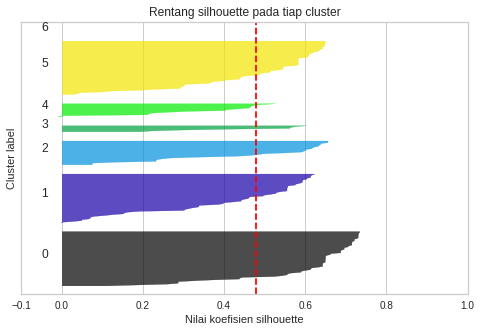

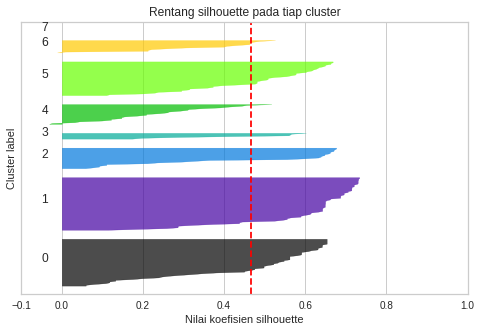

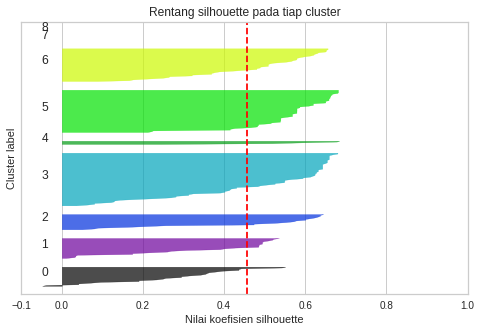

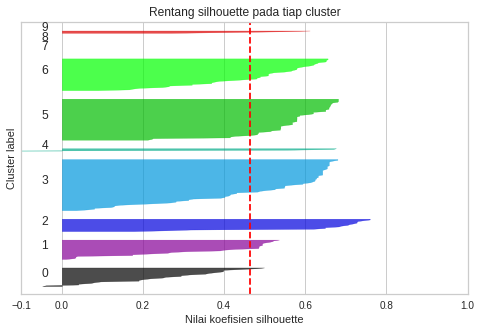

In [ ]:
for n_clusters in range(2,11):
    # membuat subplot dengan 1 baris dan 2 kolom
    fig, (ax1) = plt.subplots(1)
    fig.set_size_inches(8, 5)

    # subplot pertama berisi nilai silhouette
    # koefisien silhouette berada pada rentang -1, 1
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # (n_clusters+1)*10 untuk memberi jarak antar nilai silhouette
    
    ax1.set_ylim([0, len(x) + (n_clusters + 1) * 10])

    # menginisialisasi cluster dengan n_cluster dan random generator
    # menggunakan 10 random state
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(x)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(x, cluster_labels)
    print("Untuk n_clusters =", n_clusters,
          "Rerata silhouette_score adalah :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(x, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Rentang silhouette pada tiap cluster")
    ax1.set_xlabel("Nilai koefisien silhouette")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

In [ ]:
KM_clusters = KMeans(n_clusters=3, init='k-means++').fit(z_numerics) # initialise and fit K-Means model

KM_clustered = z_numerics.copy()
KM_clustered.loc[:,'Cluster'] = KM_clusters.labels_ # append labels to points
KM_clustered

,kode_kabupaten_kota,jumlah_banjir,jumlah_tanah_longsor,Cluster
0,3201,0,0,0
1,3202,20,48,2
2,3203,1,9,0
3,3204,17,12,0
4,3205,7,36,0
...,...,...,...,...
236,3275,5,0,1
237,3276,5,6,1
238,3277,13,1,1
239,3278,0,5,1


In [ ]:
score = silhouette_score(z_numerics, KM_clusters.labels_, metric='euclidean')
#
# Print the score
#
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.587


In [ ]:
#Uji clustering dengan parameter berbeda
data=pd.read_csv('bencana.csv')

In [ ]:
data.columns

Index(['id', 'kode_provinsi', 'nama_provinsi', 'kode_kabupaten_kota',
       'nama_kabupaten_kota', 'jumlah_puting_beliung', 'satuan', 'tahun',
       'jumlah_banjir', 'jumlah_gelombang_pasang', 'jumlah_gempa_bumi',
       'jumlah_kebakaran', 'jumlah_kebakaran_bangunan',
       'jumlah_kebakaran_lahan', 'jumlah_tanah_longsor'],
      dtype='object')

In [ ]:
data = data.drop(['jumlah_kebakaran_lahan', 'jumlah_kebakaran_bangunan'], axis=1)
data

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jumlah_puting_beliung,satuan,tahun,jumlah_banjir,jumlah_gelombang_pasang,jumlah_gempa_bumi,jumlah_kebakaran,jumlah_tanah_longsor
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,2,KEJADIAN,2012,0,0,3,0.0,0
1,2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,27,KEJADIAN,2012,20,0,41,34.0,48
2,3,32,JAWA BARAT,3203,KABUPATEN CIANJUR,23,KEJADIAN,2012,1,0,0,4.0,9
3,4,32,JAWA BARAT,3204,KABUPATEN BANDUNG,3,KEJADIAN,2012,17,0,0,3.0,12
4,5,32,JAWA BARAT,3205,KABUPATEN GARUT,28,KEJADIAN,2012,7,1,0,59.0,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,237,32,JAWA BARAT,3275,KOTA BEKASI,1,KEJADIAN,2020,5,0,0,NaN,0
237,238,32,JAWA BARAT,3276,KOTA DEPOK,3,KEJADIAN,2020,5,0,0,NaN,6
238,239,32,JAWA BARAT,3277,KOTA CIMAHI,5,KEJADIAN,2020,13,0,0,NaN,1
239,240,32,JAWA BARAT,3278,KOTA TASIKMALAYA,3,KEJADIAN,2020,0,0,0,NaN,5


In [ ]:
X = data.iloc[:, [5, 12]].values #kolom puting beliung dan tanah longsor
X1 = data.iloc[:,[8,12]].values #kolom banjir dan tanah longsor
X2 = data.iloc[:,[5,8]].values #kolom puting beliung dan banjir

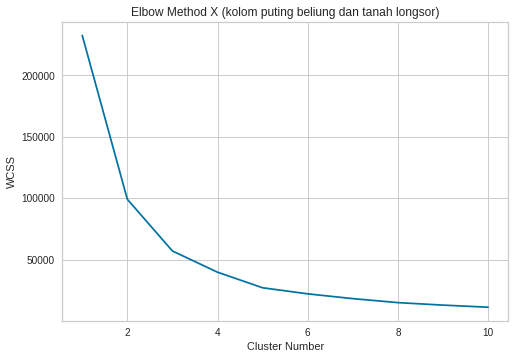

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method X (kolom puting beliung dan tanah longsor)')#kolom puting beliung dan tanah longsor
plt.xlabel('Cluster Number')
plt.ylabel('WCSS')
plt.show()

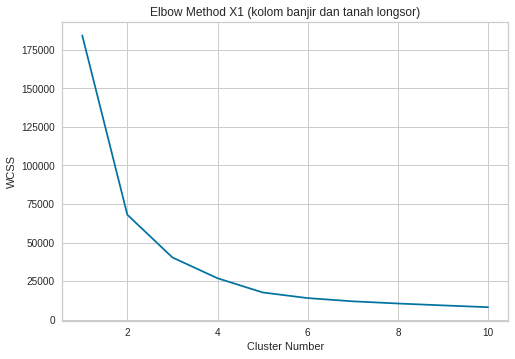

In [ ]:
#Elbow Method kolom banjir dan tanah longsor
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method X1 (kolom banjir dan tanah longsor)')#kolom banjir dan tanah longsor
plt.xlabel('Cluster Number')
plt.ylabel('WCSS')
plt.show()

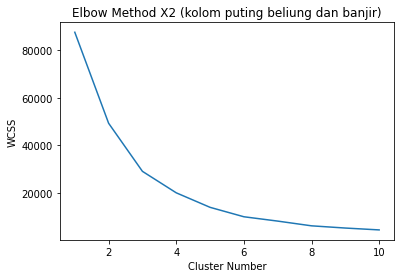

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method X2 (kolom puting beliung dan banjir)')#kolom puting beliung dan banjir
plt.xlabel('Cluster Number')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Proses K-Means Clustering

kmeans = KMeans(n_clusters = 3, init = 'k-means++', n_init=10, max_iter=100, random_state = 10)

y_kmeans = kmeans.fit_predict(X)
y_kmeans_1 = kmeans.fit_predict(X1)
y_kmeans_2 = kmeans.fit_predict(X2)


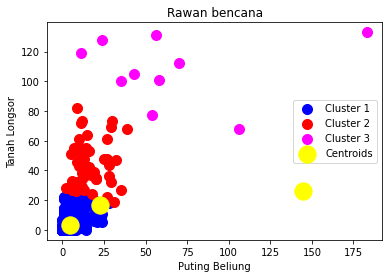

In [ ]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'red', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'magenta', label = 'Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Rawan bencana')
plt.xlabel('Puting Beliung')
plt.ylabel('Tanah Longsor')
plt.legend()


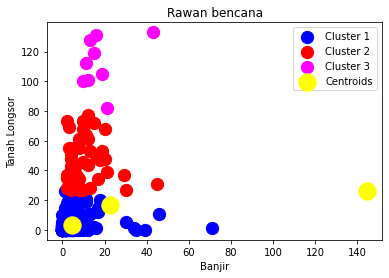

In [ ]:
#Plot 
plt.scatter(X1[y_kmeans_1== 0, 0], X1[y_kmeans_1 == 0, 1], s = 150, c = 'blue', label = 'Cluster 1')
plt.scatter(X1[y_kmeans_1== 1, 0], X1[y_kmeans_1 == 1, 1], s = 150, c = 'red', label = 'Cluster 2')
plt.scatter(X1[y_kmeans_1== 2, 0], X1[y_kmeans_1 == 2, 1], s = 150, c = 'magenta', label = 'Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Rawan bencana')
plt.xlabel('Banjir')
plt.ylabel('Tanah Longsor')
plt.legend()


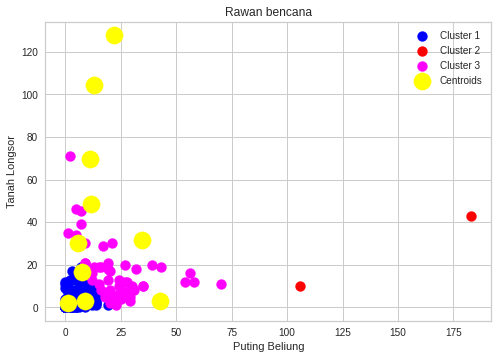

In [ ]:
#Plot 
plt.scatter(X2[y_kmeans_2== 0, 0], X2[y_kmeans_2 == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(X2[y_kmeans_2== 1, 0], X2[y_kmeans_2 == 1, 1], s = 100, c = 'red', label = 'Cluster 2')
plt.scatter(X2[y_kmeans_2== 2, 0], X2[y_kmeans_2 == 2, 1], s = 100, c = 'magenta', label = 'Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Rawan bencana')
plt.xlabel('Puting Beliung')
plt.ylabel('Tanah Longsor')
plt.legend()

In [ ]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X1, kmeans.labels_, metric='euclidean')
#
# Print the score
#
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.438


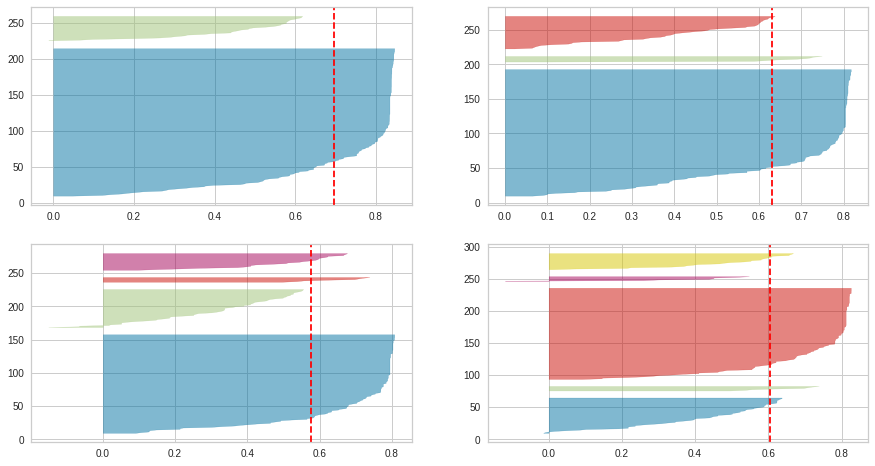

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X1)

Jadi dari klusterisasi diatas dapat disimpulkan bahwa kluster 1 merupakan daerah dengan jumlah kejadian bencana paling sedikit diantara kedua kluster, ini menandakan daerah di kluster 1 merupakan daerah yang aman dari bencana
